# Hands-on Lab: Setting up a Staging Area

* Working with Facts and Dimension Tables

```sh
    1  ls
    2  start_postgres 
    3  psql --username=postgres --host=localhost
    4  createdb -h localhost -U postgres -p 5432 billingDW
    5  wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Setting%20up%20a%20staging%20area/billing-datawarehouse.tgz
    6  tar -xvzf billing-datawarehouse.tgz 
    7  psql  -h localhost -U postgres -p 5432 billingDW < star-schema.sql 
    8  psql  -h localhost -U postgres -p 5432 billingDW < DimCustomer.sql 
    9  psql  -h localhost -U postgres -p 5432 billingDW < DimMonth.sql 
   10  cat star-schema.sql 
   11  ls
   12  cat DimCustomer.sql 
   13  ls
   14  cat DimMonth.sql |tail -5
   15  psql  -h localhost -U postgres -p 5432 billingDW < FactBilling.sql 
   16  cat FactBilling.sql | tail -10
   17  ls
   18  psql  -h localhost -U postgres -p 5432 billingDW < verify.sql 
   19  cat verify.sql
```

### Practice with the above file

```sh
# The files are here.
wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Setting%20up%20a%20staging%20area/billing-datawarehouse.tgz
```

```sh
theia@theiadocker-khanmdabid14:/home/project$ createdb -U postgres practice
createdb: error: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: No such file or directory
        Is the server running locally and accepting connections on that socket?
theia@theiadocker-khanmdabid14:/home/project$ createdb -h localhost -U postgres practice
theia@theiadocker-khanmdabid14:/home/project$ psql -U postgres practice < star-schema.sql 
psql: error: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: No such file or directory
        Is the server running locally and accepting connections on that socket?
theia@theiadocker-khanmdabid14:/home/project$ psql -h localhost -U postgres practice < star-schema.sql 
BEGIN
CREATE TABLE
CREATE TABLE
CREATE TABLE
ALTER TABLE
ALTER TABLE
COMMIT
theia@theiadocker-khanmdabid14:/home/project$ psql -h localhost -U postgres practice < DimMonth.sql
INSERT 0 132
theia@theiadocker-khanmdabid14:/home/project$ psql -h localhost -U postgres practice < 
DimCustomer.sql
INSERT 0 1000
theia@theiadocker-khanmdabid14:/home/project$ psql -h localhost -U postgres practice < 
FactBilling.sql 
INSERT 0 132000
theia@theiadocker-khanmdabid14:/home/project$ psql -h localhost -U postgres practice < 
verify.sql 
"Checking row in DimMonth Table"
 count 
-------
   132
(1 row)

"Checking row in DimCustomer Table"
 count 
-------
  1000
(1 row)

"Checking row in FactBilling Table"
 count  
--------
 132000
(1 row)

theia@theiadocker-khanmdabid14:/home/project$ 
```

# Populating a Data Warehouse

* Create service credentials in IBM DB2 cloud instance.

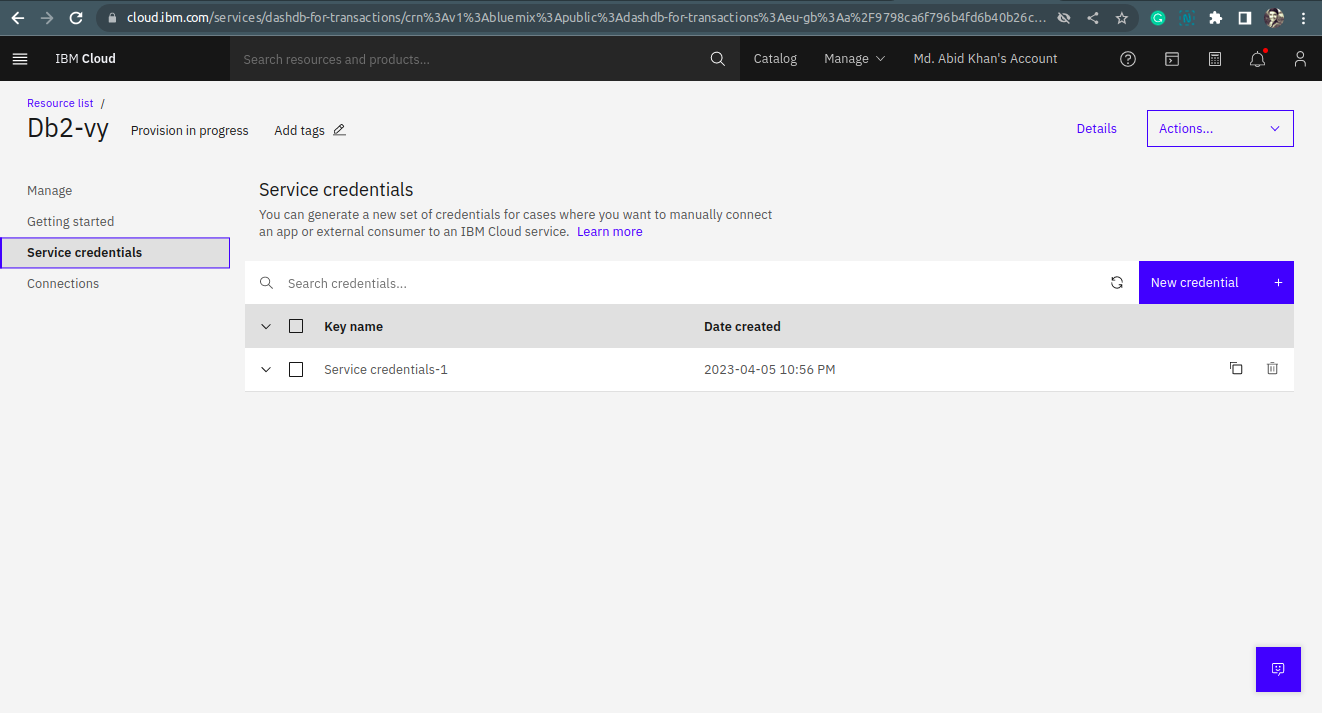

* Commands in terminal to access and import in the above DB2 instance

```sh
    2  db2cli writecfg add -database BLUDB -host 0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud -port 31198 -parameter "SecurityTransportMode=SSL"
    3  db2cli writecfg add -dsn production -database BLUDB -host 0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud -port 31198
    4  db2cli validate -dsn production -connect -user fpx98409 -passwd eofwGd0p89jYetmS
    5  wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Populating%20a%20Data%20Warehouse/star-schema.sql
    6  db2cli execsql -dsn production -user fpx98409 -passwd eofwGd0p89jYetmS -inputsql star-schema.sql
    7  wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Populating%20a%20Data%20Warehouse/DimCustomer.sql
    8  wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Populating%20a%20Data%20Warehouse/DimMonth.sql
    9  wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Populating%20a%20Data%20Warehouse/FactBilling.sql
   10  ls *.sql
   11  sudo apt install screen
   12  db2cli execsql -dsn production -user fpx98409 -passwd eofwGd0p89jYetmS -inputsql DimCustomer.sql && db2cli execsql -dsn production -user fpx98409 -passwd eofwGd0p89jYetmS -inputsql DimMonth.sql && db2cli execsql -dsn production -user fpx98409 -passwd eofwGd0p89jYetmS -inputsql FactBilling.sql > db_import.log 2>&1
   13  ls
   14  wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0260EN-SkillsNetwork/labs/Populating%20a%20Data%20Warehouse/verify.sql
   15  db2cli execsql -dsn production -user fpx98409 -passwd eofwGd0p89jYetmS -inputsql verify.sql 
   16  db2cli execsql -dsn production -user fpx98409 -passwd eofwGd0p89jYetmS
```

* Couple of SQL queries and the result of the Querying the Data Warehouse lab

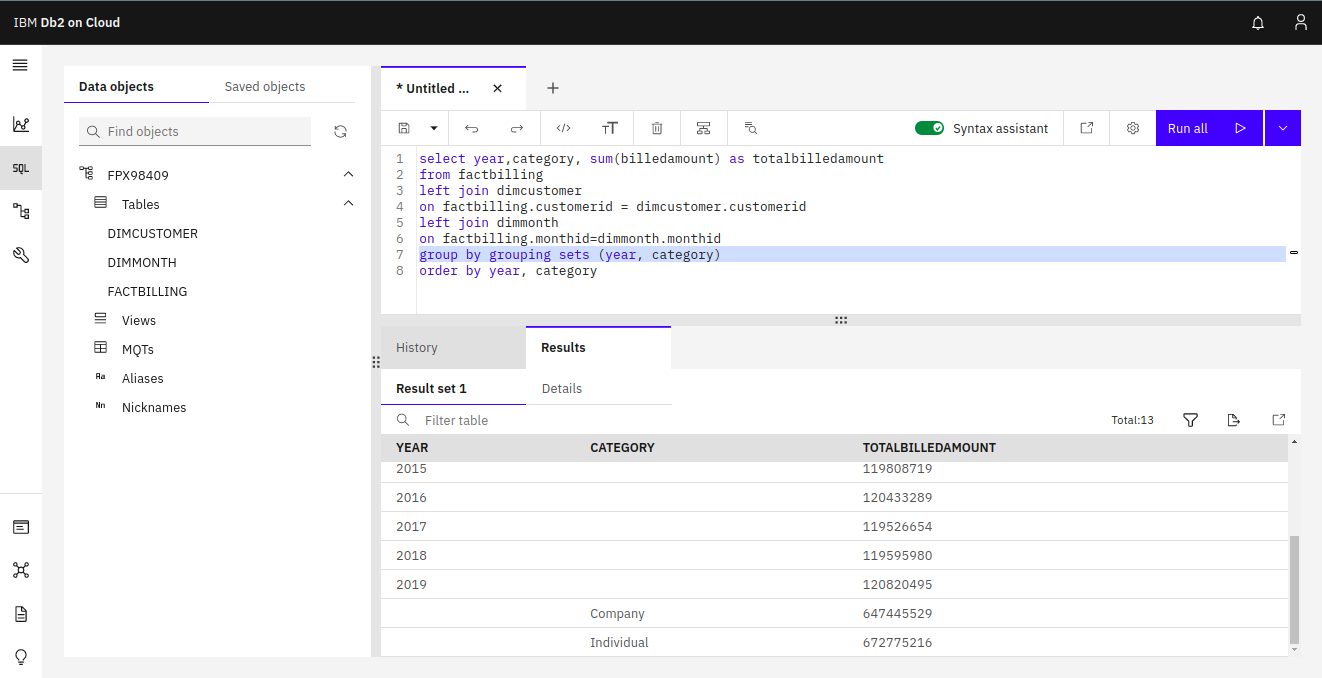

* Here is an example of **GROUPING SETS** in postgres

```sql
SELECT brand, segment, SUM (quantity) FROM sales GROUP BY brand, segment
UNION ALL SELECT brand, NULL, SUM (quantity) FROM sales GROUP BY brand 
UNION ALL SELECT NULL, segment, SUM (quantity) FROM sales GROUP BY segment 
UNION ALL SELECT NULL, NULL, SUM (quantity) FROM sales;
_________________________________
is similar to the below query
_________________________________
SELECT brand, segment, SUM (quantity) FROM sales
GROUP BY
    GROUPING SETS (
        (brand, segment),
        (brand),
        (segment),
        ()
    );
```

* Something about postgres **ROLLUP**

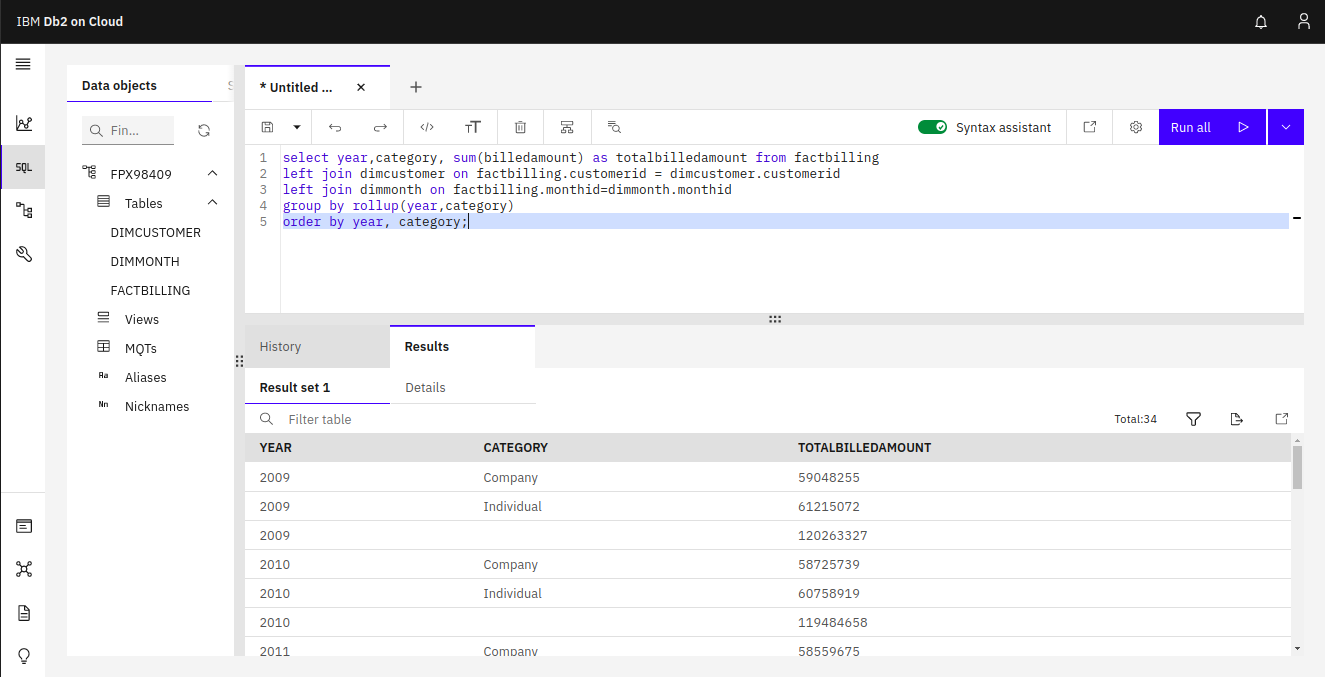

```sql
select year,category, sum(billedamount) as totalbilledamount from factbilling
left join dimcustomer on factbilling.customerid = dimcustomer.customerid
left join dimmonth on factbilling.monthid=dimmonth.monthid
group by grouping sets ((year, category), (year), (category), ())
order by year, category;


/* is similar to the below query */

select year,category, sum(billedamount) as totalbilledamount from factbilling
left join dimcustomer on factbilling.customerid = dimcustomer.customerid
left join dimmonth on factbilling.monthid=dimmonth.monthid
group by rollup(year,category)
order by year, category;
```

* **CUBE** in postgres

```sql
CUBE(c1,c2,c3)

/* is similar to the below query */

GROUPING SETS (
    (c1,c2,c3), 
    (c1,c2),
    (c1,c3),
    (c2,c3),
    (c1),
    (c2),
    (c3), 
    ()
)
```

_In general, if the number of columns specified in the CUBE is n, then you will have 2**n combinations._

* **GROPUING SETS**, **ROLLUP** and **CUBE** comparison

```sql
/* CUBE subclause returns all the combinations of the specified columns. */

CUBE(c1,c2,c3)

GROUPING SETS (
    (c1,c2,c3), 
    (c1,c2),
    (c1,c3),
    (c2,c3),
    (c1),
    (c2),
    (c3), 
    ()
)

/* where ROLLUP subclause will generate the below grouping sets. */

ROLLUP(c1,c2,c3)

GROUPING SETS (
    (c1, c2, c3)
    (c1, c2)
    (c1)
    ()
)
```

* Create the **MQT** (Materialized query tables) named countrystats with the below query

```sql
/* Warning: The materialized query table may not be used to optimize the processing of queries. */

CREATE TABLE countrystats (country, year, totalbilledamount) AS
  (select country, year, sum(billedamount)
from factbilling
left join dimcustomer
on factbilling.customerid = dimcustomer.customerid
left join dimmonth
on factbilling.monthid=dimmonth.monthid
group by country,year)
     DATA INITIALLY DEFERRED
     REFRESH DEFERRED
     MAINTAINED BY SYSTEM;
```

The settings

1. DATA INITIALLY DEFERRED
2. REFRESH DEFERRED
3. MAINTAINED BY SYSTEM

Simple mean that data is not initially populated into this MQT. Whenever the underlying data changes, the MQT does NOT automatically refresh. The MQT is system maintained and not user maintained.

* Populate/refresh data into the MQT with the below query

```sql
refresh table countrystats;
```

* Query the MQT

```sql
select * from countrystats;
```

### Practice queries with the above lab

```sql
/* Problem 1 */

select year, quartername, sum(billedamount) as totalbilledamount from factbilling
left join dimcustomer on factbilling.customerid = dimcustomer.customerid
left join dimmonth on factbilling.monthid=dimmonth.monthid
group by grouping sets ((year, quartername), (year), (quartername), ())
order by year, quartername;
```

```sql
/* Problem 2 */

select country, category, sum(billedamount) as totalbilledamount from factbilling
left join dimcustomer on factbilling.customerid = dimcustomer.customerid
left join dimmonth on factbilling.monthid=dimmonth.monthid
group by rollup(country, category)
order by country, category;
```

```sql
/* Problem 3 */

select year, country, category, sum(billedamount) as totalbilledamount from factbilling
left join dimcustomer on factbilling.customerid = dimcustomer.customerid
left join dimmonth on factbilling.monthid=dimmonth.monthid
group by cube(year, country, category)
order by year, country, category;
```

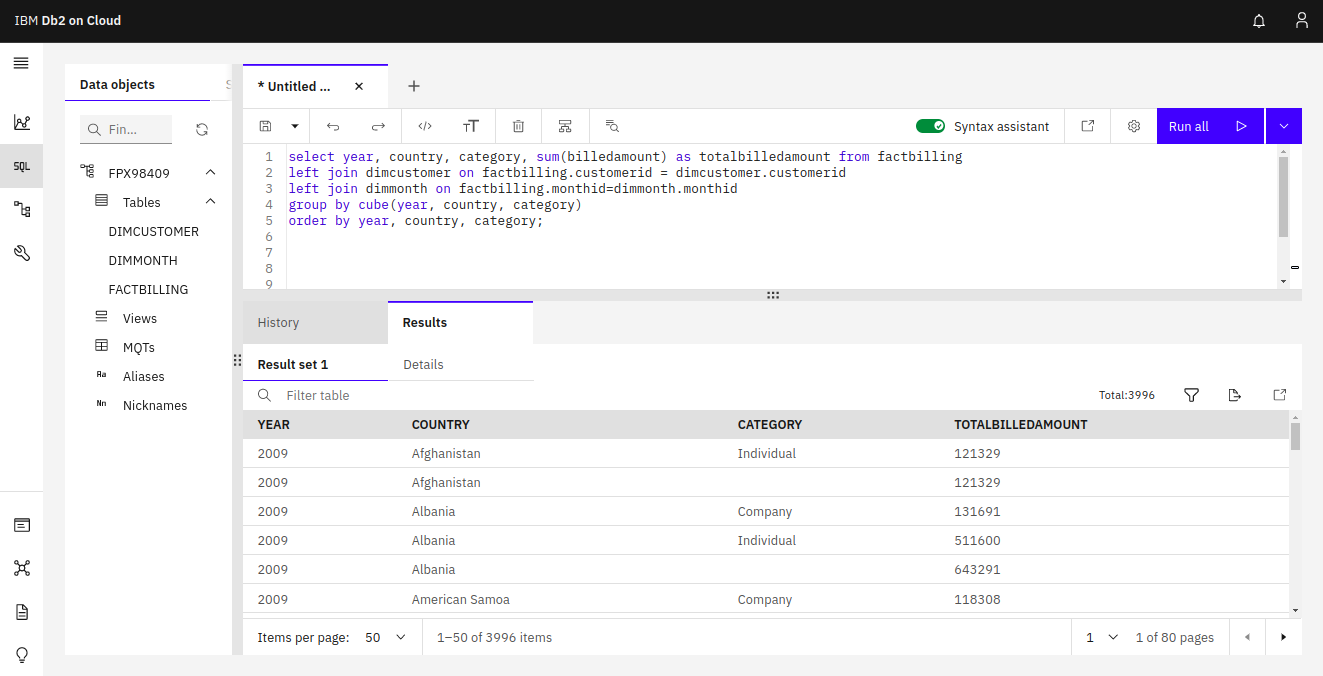

```sql
/* Problem 4 */

CREATE TABLE average_billamount (year, quarter, category, country, average_bill_amount) AS
  (select year, quarter, category, country, avg(billedamount)
from factbilling
left join dimcustomer on factbilling.customerid = dimcustomer.customerid
left join dimmonth on factbilling.monthid=dimmonth.monthid
group by year, quarter, category, country)
     DATA INITIALLY DEFERRED
     REFRESH DEFERRED
     MAINTAINED BY SYSTEM;
```

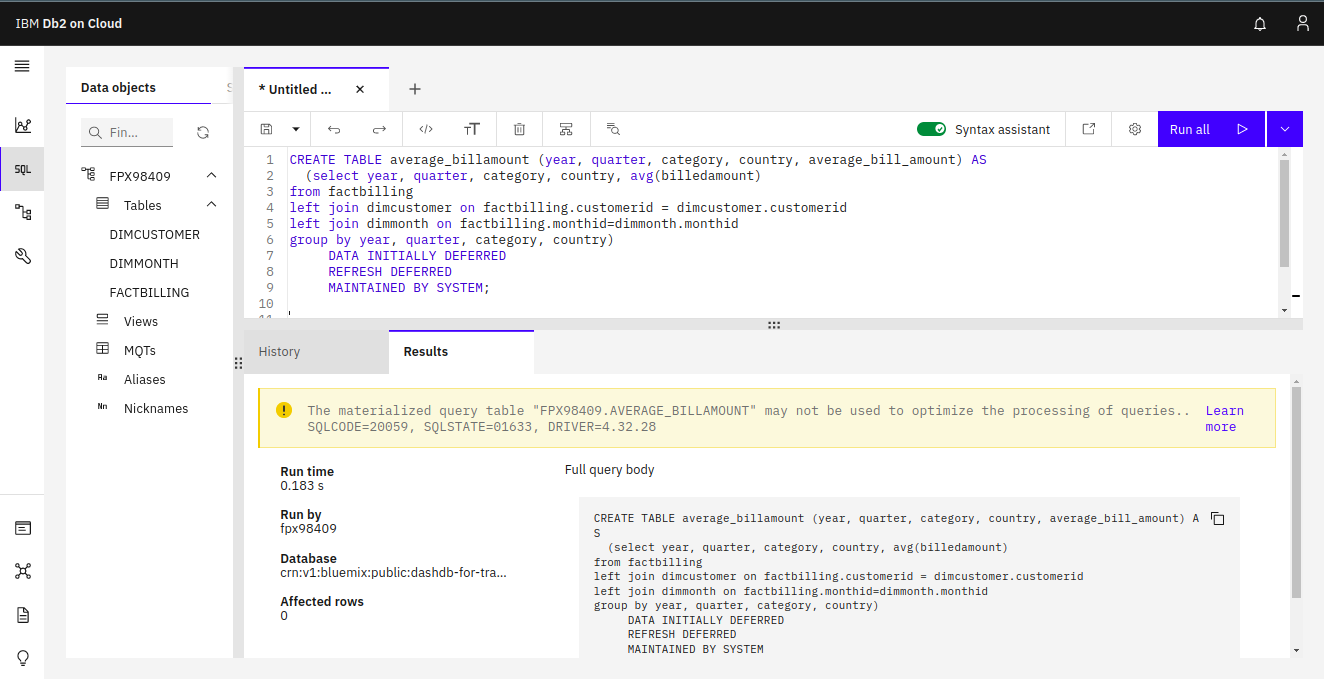

* Refresh the table

```sql
refresh table average_billamount;
```

* Select query on MQT average_billamount

```sql
select * from average_billamount;
```

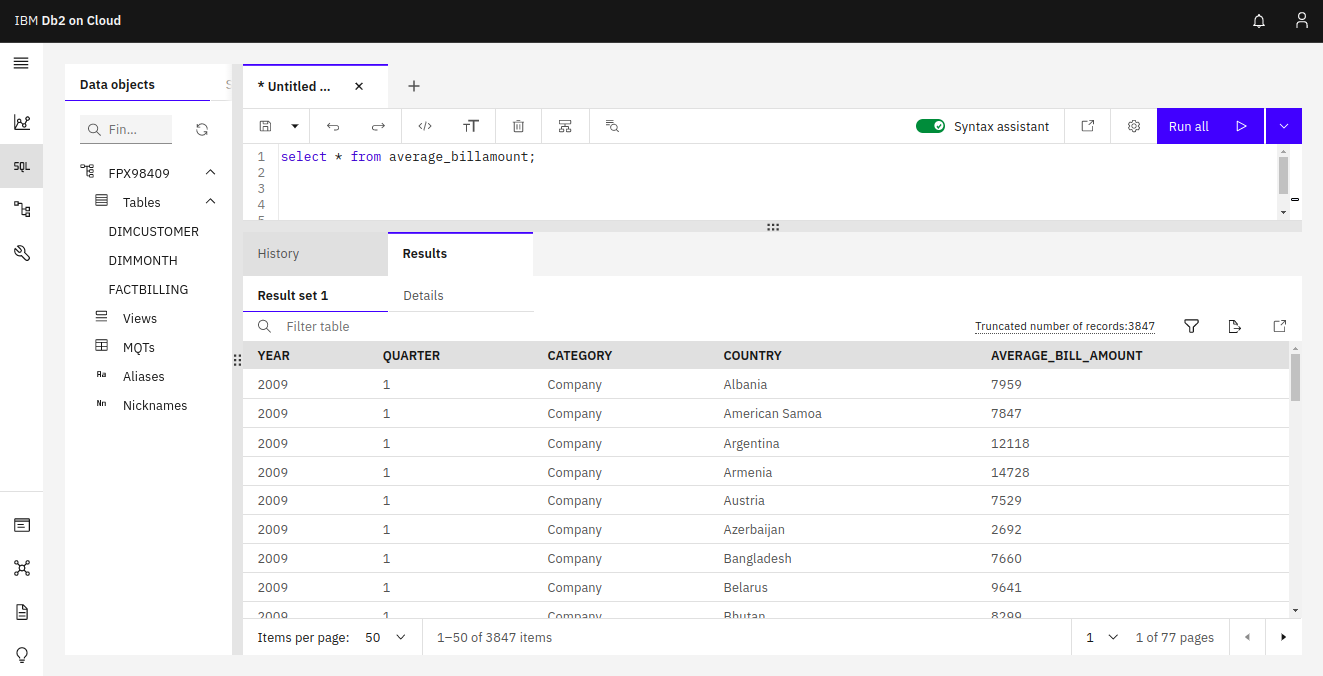

<br>

_Wow, It's completed_

<br>